**Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.**

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

**В некоторых параметрах есть нулевые значения. Также нужно перевести данные к нужным типам. Поправить регистр.**

## Подготовка данных.

In [3]:
data.columns = data.columns.str.lower() # переведем столбцы в нижний регистр

In [4]:
data['name'] = data['name'].str.lower() # аналогичто с именами

В `name` 2 записи нулевые. Посмотрим.

In [5]:
data[data['name'].isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Не имен, ни жанра, ни рейтингов. Думаю можно эти строки просто удалить.

In [6]:
data.dropna(subset=['name'],inplace=True)
data.reset_index(drop=True)

name platform  year_of_release         genre  \
0                         wii sports      Wii           2006.0        Sports   
1                  super mario bros.      NES           1985.0      Platform   
2                     mario kart wii      Wii           2008.0        Racing   
3                  wii sports resort      Wii           2009.0        Sports   
4           pokemon red/pokemon blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16708  samurai warriors: sanada maru      PS3           2016.0        Action   
16709               lma manager 2007     X360           2006.0        Sports   
16710        haitaka no psychedelica      PSV           2016.0     Adventure   
16711               spirits & spells      GBA           2003.0      Platform   
16712            winning post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16708      0.00      0.00      0.01         0.00           NaN        NaN   
16709      0.00      0.01      0.00         0.00           NaN        NaN   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.01      0.00      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16708    NaN  
16709    NaN  
16710    NaN  
16711    NaN  
16712    NaN  

[16713 rows x 11 columns]

Чтобы перевести года в `int`, нужно избавиться от пропусков. Заменим на пока на нули

In [7]:
data['year_of_release'].fillna(0, inplace = True)
data['year_of_release'] = data['year_of_release'].astype(int)

In [8]:
data.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      Wii             2006        Sports     41.36   
1         super mario bros.      NES             1985      Platform     29.08   
2            mario kart wii      Wii             2008        Racing     15.68   
3         wii sports resort      Wii             2009        Sports     15.61   
4  pokemon red/pokemon blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [9]:
data[data['year_of_release'] == 0]

name platform  year_of_release  \
183                      madden nfl 2004      PS2                0   
377                     fifa soccer 2004      PS2                0   
456           lego batman: the videogame      Wii                0   
475           wwe smackdown vs. raw 2006      PS2                0   
609                       space invaders     2600                0   
...                                  ...      ...              ...   
16373  pdc world championship darts 2008      PSP                0   
16405                      freaky flyers       GC                0   
16448                          inversion       PC                0   
16458        hakuouki: shinsengumi kitan      PS3                0   
16522                       virtua quest       GC                0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      user_score rating  
183          8.5      E  
377          6.4      E  
456          7.9   E10+  
475          NaN    NaN  
609          NaN    NaN  
...          ...    ...  
16373        tbd   E10+  
16405        6.5      T  
16448        6.7      M  
16458        NaN    NaN  
16522        5.5      T  

[269 rows x 11 columns]

Попробуем найти совпадения по названиям и вычислить год.

In [10]:
data[data['name'] == 'madden nfl 2004']

name platform  year_of_release   genre  na_sales  eu_sales  \
183   madden nfl 2004      PS2                0  Sports      4.26      0.26   
1881  madden nfl 2004       XB             2003  Sports      1.02      0.02   
3889  madden nfl 2004       GC             2003  Sports      0.40      0.10   
5708  madden nfl 2004      GBA             2003  Sports      0.22      0.08   

      jp_sales  other_sales  critic_score user_score rating  
183       0.01         0.71          94.0        8.5      E  
1881      0.00         0.05          92.0        8.3      E  
3889      0.00         0.01          94.0        7.7      E  
5708      0.00         0.01          70.0        6.6      E

Попробуем написать функцию, которая будет вытаскивать год и подставлять, если есть совпадение по имени игры.

In [11]:
def transfer(row):
    if row['year_of_release'] == 0:
        name = row['name']
        return data[data['name'] == name]['year_of_release'].max()
    else:
        return row['year_of_release']

In [12]:
data['year_of_release'] = data.apply(transfer, axis=1)

In [13]:
data.loc[[183]]

name platform  year_of_release   genre  na_sales  eu_sales  \
183  madden nfl 2004      PS2             2003  Sports      4.26      0.26   

     jp_sales  other_sales  critic_score user_score rating  
183      0.01         0.71          94.0        8.5      E

Использовал max, т.к у среднего и медианы есть свои недостатки.

In [14]:
data[data['year_of_release'] == 0]

name platform  year_of_release  \
475                  wwe smackdown vs. raw 2006      PS2                0   
627                                   rock band     X360                0   
657    frogger's adventures: temple of the frog      GBA                0   
805                                   rock band      Wii                0   
1142                                  rock band      PS3                0   
...                                         ...      ...              ...   
16277           homeworld remastered collection       PC                0   
16288                                    shorts       DS                0   
16348              agarest senki: re-appearance      PS3                0   
16458               hakuouki: shinsengumi kitan      PS3                0   
16522                              virtua quest       GC                0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
475        Fighting      1.57      1.02      0.00         0.41           NaN   
627            Misc      1.93      0.33      0.00         0.21          92.0   
657       Adventure      2.15      0.18      0.00         0.07          73.0   
805            Misc      1.33      0.56      0.00         0.20          80.0   
1142           Misc      0.99      0.41      0.00         0.22          92.0   
...             ...       ...       ...       ...          ...           ...   
16277      Strategy      0.00      0.01      0.00         0.00          86.0   
16288      Platform      0.01      0.00      0.00         0.00           NaN   
16348  Role-Playing      0.00      0.00      0.01         0.00           NaN   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      user_score rating  
475          NaN    NaN  
627          8.2      T  
657          tbd      E  
805          6.3      T  
1142         8.4      T  
...          ...    ...  
16277        8.2   E10+  
16288        tbd   E10+  
16348        NaN    NaN  
16458        NaN    NaN  
16522        5.5      T  

[146 rows x 11 columns]

Не для всех игр нашлись совпадения. Для 146 строк брать год попросту неоткуда. Оставим 0 и будем считать это маркером-заглушкой. В нулевом году врядли выпускались компьютерные игры.

In [15]:
data['platform'] = data['platform'].str.lower() # колонку с платформой тоже в нижний регистр

In [16]:
data['genre'] = data['genre'].str.lower() # аналогично с жанром

Столбцы с продажами трогать не будем. Если перевести миллионы в единицы, будет куча значений с нулями.А в таком виде данные более понятны.

В столбце оценок много пропущенных значений. Почти половина данных. Возможно можно заполнить их по аналогии с годом.

In [17]:
data[data['name'] == 'madden nfl 2004']

name platform  year_of_release   genre  na_sales  eu_sales  \
183   madden nfl 2004      ps2             2003  sports      4.26      0.26   
1881  madden nfl 2004       xb             2003  sports      1.02      0.02   
3889  madden nfl 2004       gc             2003  sports      0.40      0.10   
5708  madden nfl 2004      gba             2003  sports      0.22      0.08   

      jp_sales  other_sales  critic_score user_score rating  
183       0.01         0.71          94.0        8.5      E  
1881      0.00         0.05          92.0        8.3      E  
3889      0.00         0.01          94.0        7.7      E  
5708      0.00         0.01          70.0        6.6      E

In [18]:
data[data['name'] == 'inversion']

name platform  year_of_release    genre  na_sales  eu_sales  \
12146  inversion      ps3             2012  shooter      0.03      0.03   
12678  inversion     x360             2012  shooter      0.03      0.02   
16448  inversion       pc             2012  shooter      0.01      0.00   

       jp_sales  other_sales  critic_score user_score rating  
12146       0.0         0.01          56.0        5.4      M  
12678       0.0         0.01          53.0        6.5      M  
16448       0.0         0.00          59.0        6.7      M

Оценки критиков и юзеров неодинаковы на разных платформах. Заполнить их также как и год не получится. Можно конечно заполнить средним по названию, но это только усреднит данные и скорее всего исказит некоторые выводы. К тому же у некоторых игр вообще не будет копий на других платформах.Опять таки придется заполнить заглушкой-нулями и перевести к общему виду.

In [19]:
data['critic_score'].fillna(0, inplace = True)
data['critic_score'] = data['critic_score'].astype(int)
data['user_score'].fillna('0', inplace = True)

В рейтингах юзеров у нас есть абреввиатура `tbd`.

In [20]:
data[data['user_score'] == 'tbd']

name platform  year_of_release  \
119                               zumba fitness      wii             2010   
301              namco museum: 50th anniversary      ps2             2005   
520                             zumba fitness 2      wii             2011   
645                                udraw studio      wii             2010   
657    frogger's adventures: temple of the frog      gba                0   
...                                         ...      ...              ...   
16695                           planet monsters      gba             2001   
16697                          bust-a-move 3000       gc             2003   
16698                          mega brain boost       ds             2008   
16704                                  plushees       ds             2008   
16706             men in black ii: alien escape       gc             2003   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        sports      3.45      2.59       0.0         0.66             0   
301          misc      2.08      1.35       0.0         0.54            61   
520        sports      1.51      1.03       0.0         0.27             0   
645          misc      1.65      0.57       0.0         0.20            71   
657     adventure      2.15      0.18       0.0         0.07            73   
...           ...       ...       ...       ...          ...           ...   
16695      action      0.01      0.00       0.0         0.00            67   
16697      puzzle      0.01      0.00       0.0         0.00            53   
16698      puzzle      0.01      0.00       0.0         0.00            48   
16704  simulation      0.01      0.00       0.0         0.00             0   
16706     shooter      0.01      0.00       0.0         0.00             0   

      user_score rating  
119          tbd      E  
301          tbd   E10+  
520          tbd      T  
645          tbd      E  
657          tbd      E  
...          ...    ...  
16695        tbd      E  
16697        tbd      E  
16698        tbd      E  
16704        tbd      E  
16706        tbd      T  

[2424 rows x 11 columns]

Много записей с непонятным рейтингом. Игры разных жанров, платформ и дат релизов. Продаж по этим играм маловато, а это значит они не особо популярные.В них мало играют и мало их оценивают. А вот игры-бестселлеры отлично продаются и поэтому имеют высокие рейтинги.

In [21]:
data[data['name'] == 'nba live 2001']

name platform  year_of_release   genre  na_sales  eu_sales  \
1582  nba live 2001       ps             2000  sports      0.70      0.47   
1862  nba live 2001      ps2             2001  sports      0.52      0.40   

      jp_sales  other_sales  critic_score user_score rating  
1582      0.00         0.08            86          8      E  
1862      0.04         0.13            74        tbd      E

2 игры похожи между собой. На разных платформах, но как правило они по большей части одинаковые, продажи по ним примерно одинаковые. Следовательно можно предположить, что и рейтинги примерно одинаковые. Истинное значение врядли можно посчитать, поэтому можно взять рейтинг, который есть и заменить им пропуски. По-другому все равно значения не получить. А так для части данных мы присвоим близкие к истинным рейтинги, для игр, у которых они были. Если совпадения не найдем, то заменим нулями. 0 будет значить - нет рейтинга.

In [22]:
data['user_score'] = data['user_score'].replace('tbd','0')

In [23]:
def userrate(row):
    if row['user_score'] == '0':
        name = row['name']
        return data[data['name'] == name]['user_score'].max()
    else:
        return row['user_score']

In [24]:
data['user_score'] = data.apply(userrate, axis=1)

Аналогично сделаем и для критиков.

In [25]:
def criticrate(row):
    if row['critic_score'] == 0:
        name = row['name']
        return data[data['name'] == name]['critic_score'].max()
    else:
        return row['critic_score']

In [26]:
data['critic_score'] = data.apply(criticrate, axis=1)

In [27]:
data['critic_score'] = data['critic_score'] / 10
data['user_score'] = data['user_score'].astype(float)

In [28]:
data['rating'].unique() # столбец rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Гугл нам даёт информацию о возрастном рейтинге:

EC (Early childhood) — Для детей младшего возраста.
E (Everyone) — Для всех. Первоначально до 1998г. был K-A (Kids to Adults).
E10+ (Everyone 10 and older) — Для всех от 10 лет и старше.
T (Teen) — Подросткам.
M (Mature) — Для взрослых.
AO (Adults Only 18+) — Только для взрослых.
RP (Rating Pending) — Рейтинг ожидается.

Во-первых, нужно заменить К-А на E, это одно и то же. Там где рейтинга нет, то опять же проверим имена игр на других платформах, и если найдем, то восстановим часть данных. Остальные данные оставим нулями.

In [29]:
data['rating'].fillna('0', inplace = True)
data['rating'] = data['rating'].replace('K-A','E')

In [30]:
def ratingfunc(row):
    if row['rating'] == '0':
        name = row['name']
        return data[data['name'] == name]['rating'].max()
    else:
        return row['rating']

In [31]:
data['rating'] = data.apply(ratingfunc, axis=1)

In [32]:
data.rating = data.rating.str.lower()

In [33]:
data.rating.value_counts()

0       6327
e       4150
t       3097
m       1653
e10+    1471
ec        10
rp         4
ao         1
Name: rating, dtype: int64

Все равно без рейтинга осталось больше 6 тысяч игр.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 2.2+ MB


Осталось посчитать суммарные продажи и записать в новый столбец.

In [35]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data = data[
    ['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','total_sales','critic_score','user_score','rating']
]

In [36]:
data.head(10)

name platform  year_of_release         genre  \
0                 wii sports      wii             2006        sports   
1          super mario bros.      nes             1985      platform   
2             mario kart wii      wii             2008        racing   
3          wii sports resort      wii             2009        sports   
4   pokemon red/pokemon blue       gb             1996  role-playing   
5                     tetris       gb             1989        puzzle   
6      new super mario bros.       ds             2006      platform   
7                   wii play      wii             2006          misc   
8  new super mario bros. wii      wii             2009      platform   
9                  duck hunt      nes             1984       shooter   

   na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
0     41.36     28.96      3.77         8.45        82.54           7.6   
1     29.08      3.58      6.81         0.77        40.24           0.0   
2     15.68     12.76      3.79         3.29        35.52           8.2   
3     15.61     10.93      3.28         2.95        32.77           8.0   
4     11.27      8.89     10.22         1.00        31.38           0.0   
5     23.20      2.26      4.22         0.58        30.26           0.0   
6     11.28      9.14      6.50         2.88        29.80           8.9   
7     13.96      9.18      2.93         2.84        28.91           5.8   
8     14.44      6.94      4.70         2.24        28.32           8.7   
9     26.93      0.63      0.28         0.47        28.31           0.0   

   user_score rating  
0         8.0      e  
1         0.0      0  
2         8.3      e  
3         8.0      e  
4         0.0      0  
5         0.0      0  
6         8.5      e  
7         6.6      e  
8         8.4      e  
9         0.0      0

**Вывод** На этом предобработка заканчивается. Часть потерянных значений удалось восстановить близкими к предполагаемым. Можно приступать непосредственно к анализу.

## Исследовательский анализ данных.

Посмотрим, сколько игр выпускалось в разные годы. И важны ли данные за все периоды?

Text(0.5, 1.0, 'Количество игр по годам')

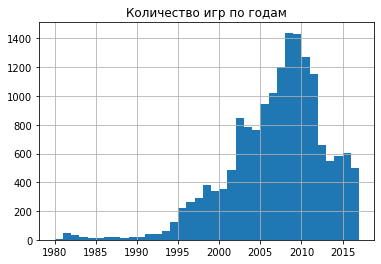

In [37]:
data['year_of_release'].hist(bins=37,range=(1980,2017)).set_title('Количество игр по годам')

До 1995 рынок игр был достаточно малым. Развитие компьютеров, технологий, сетей заметно ускорило создание разнообразных игр. Пики по релизам приходятся на 2007-2012. А дальше идет спад. Видимо далее компании-разработчики начали делать упор не на количество, а на качество. Меньше выпускается продукта, но он более качественный.

Посмотрим, как менялись продажи по различным платформам.

In [38]:
platform_sales = data.pivot_table(index='platform', values=['total_sales'], aggfunc=['sum'])
platform_sales.columns = ['total_sales']
platform_sales.sort_values(by =['total_sales'],ascending=False)

total_sales
platform             
ps2           1255.77
x360           971.42
ps3            939.65
wii            907.51
ds             806.12
ps             730.86
gba            317.85
ps4            314.14
psp            294.05
pc             259.52
3ds            259.00
xb             257.74
gb             255.46
nes            251.05
n64            218.68
snes           200.04
gc             198.93
xone           159.32
2600            96.98
wiiu            82.19
psv             54.07
sat             33.59
gen             28.35
dc              15.95
scd              1.86
ng               1.44
ws               1.42
tg16             0.16
3do              0.10
gg               0.04
pcfx             0.03

In [39]:
platform_sales_years = data[data['year_of_release'] > 0].pivot_table(index=['platform','year_of_release'], values=['total_sales'], aggfunc=['sum'])
platform_sales_years.columns = ['total_sales']

Выберем из списка топ-5 платформ и построим распределение по годам.

In [40]:
top5platforms = ['ps2','x360','ps3','wii','ds']
top5platforms_data = data.query('platform in @top5platforms')
top5platforms_data = top5platforms_data[top5platforms_data['year_of_release'] > 0]

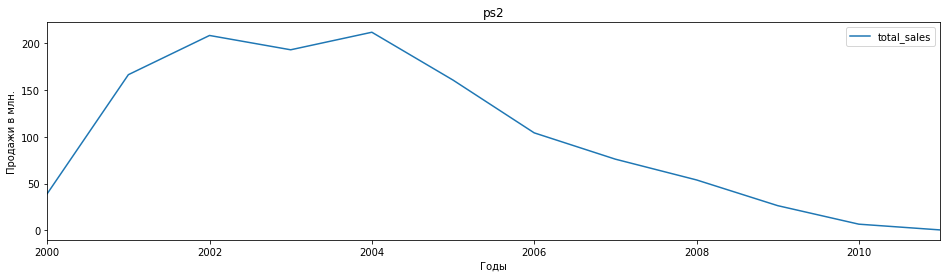

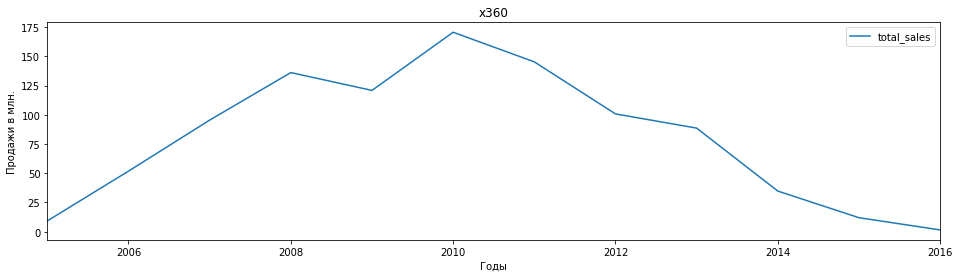

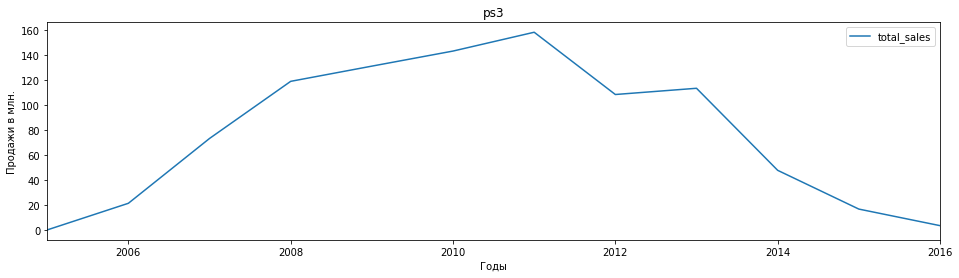

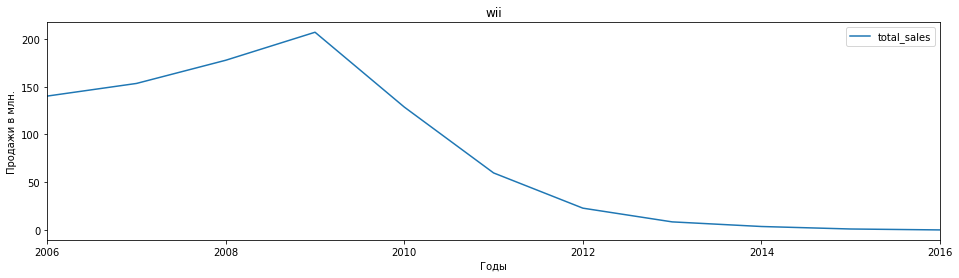

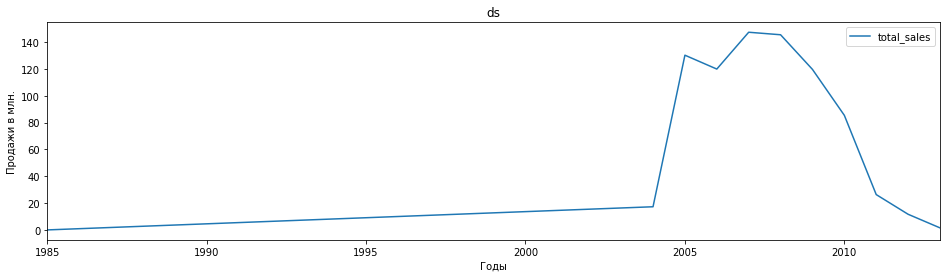

In [41]:
for platform in top5platforms:
    platform_sales_years.loc[(platform,)].plot(figsize= (16,4))
    plt.title(platform)
    plt.xlabel('Годы')
    plt.ylabel('Продажи в млн.')
    plt.show()

In [42]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

platforms = data[data['year_of_release'] > 0]['platform'].unique()

size = math.ceil(math.sqrt(len(platforms)))

all_sales = data[data['year_of_release'] > 0].groupby(['platform','year_of_release']).agg({'total_sales' : 'sum'}).reset_index()

fig = make_subplots(
    rows=size, cols=size,
    subplot_titles=(platforms))

row = 0
col = 0

for i,p in enumerate(platforms):        
    
    if i % size == 0:
        col = 1
        row += 1
    else:
        col += 1
    data_ = all_sales[all_sales['platform'] == p]
    fig.add_trace(go.Scatter(x = data_['year_of_release'], y = data_['total_sales']),
              row=row, col=col)
    

fig.update_layout(height=1000, width=1000,
                  title_text="Распределение продаж по годам")

fig.show()

По графикам продаж топ-5 платформ видно, что срок жизни платформы примерно равен 10 годам. К примеру у PlayStation, с выходом каждой новой версии продажи у предыдущей начинают сильнее падать,а новой расти. Наверно у других производитей ситуация похожая. Под конец жизни платформы игры просто перестают покупать, соответственно производитель перестает выпускать игры под них.

Теперь нам нужно выбрать актуальный период. На примере топ-5 платформ актуальный период можно взять первые 5-6 лет, потом продажи игр под них начинают падать. Также появляются новые платформы. Соответственно актуальный период можно считать начиная с 2010года и дальше.

Отфильтруем данные на наше актуальное время.

In [43]:
actual_data = data[data['year_of_release'] >= 2012].reset_index(drop=True)

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [44]:
actial_platform_sales = actual_data.pivot_table(index='platform', values=['total_sales'], aggfunc=['sum'])
actial_platform_sales.columns = ['total_sales']
actial_platform_sales.sort_values(by =['total_sales'],ascending=False)

total_sales
platform             
ps4            314.14
ps3            289.71
x360           237.52
3ds            195.01
xone           159.32
wiiu            82.19
pc              63.51
psv             49.18
wii             36.60
ds              13.21
psp             11.69

Построим графики продаж для каждой платформы, чтобы проанализировать потенциал.

In [45]:
actual_platform_sales_years = actual_data.pivot_table(index=['platform','year_of_release'], values=['total_sales'], aggfunc=['sum'])
actual_platform_sales_years.columns = ['total_sales']

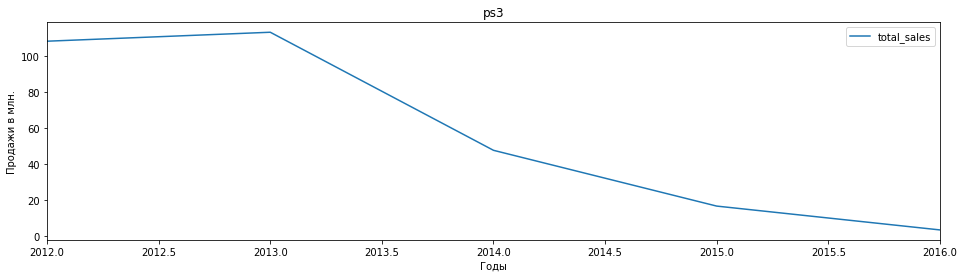

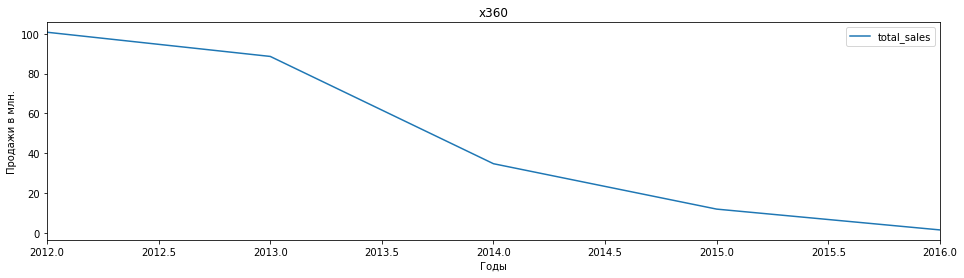

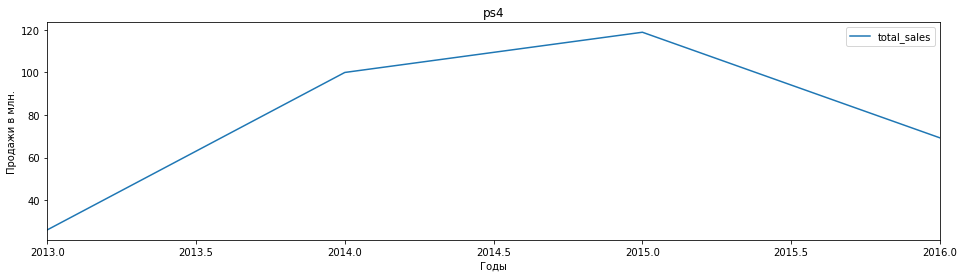

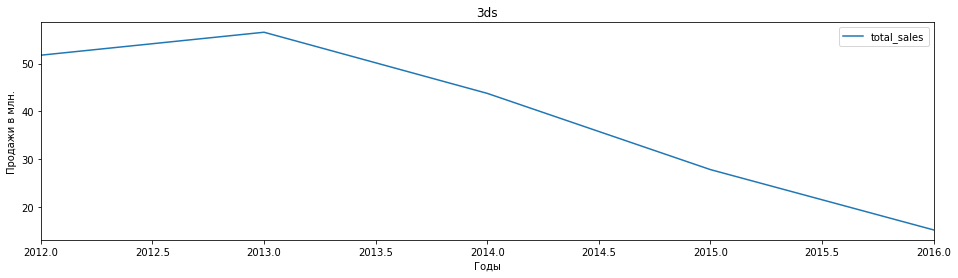

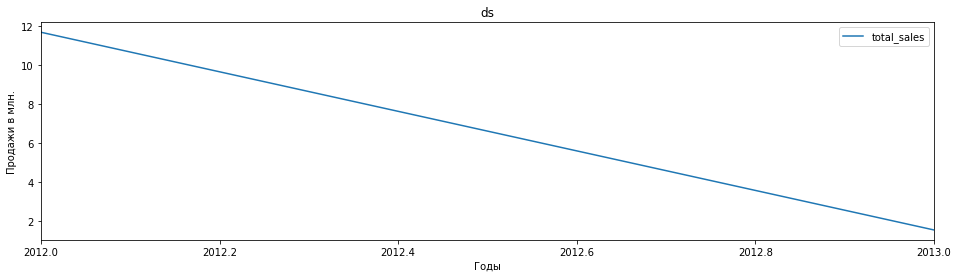

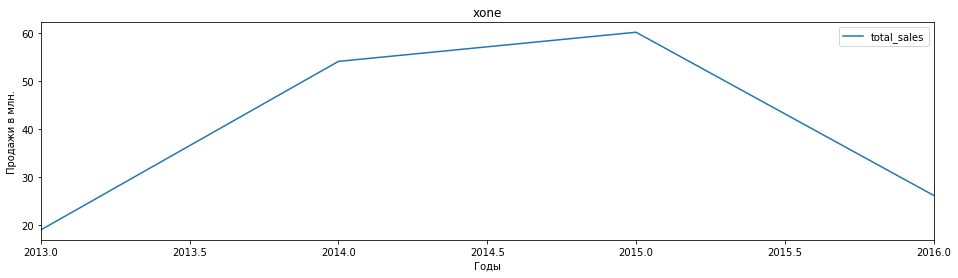

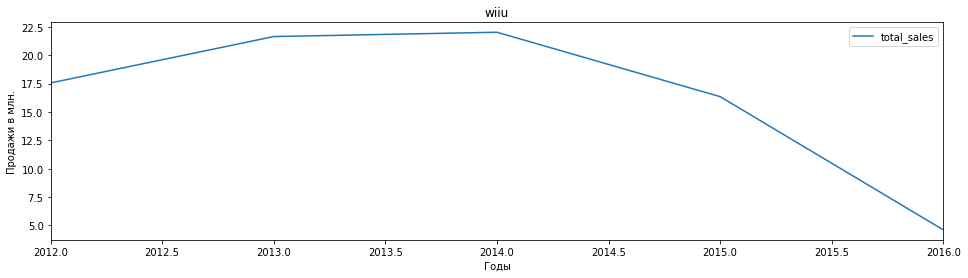

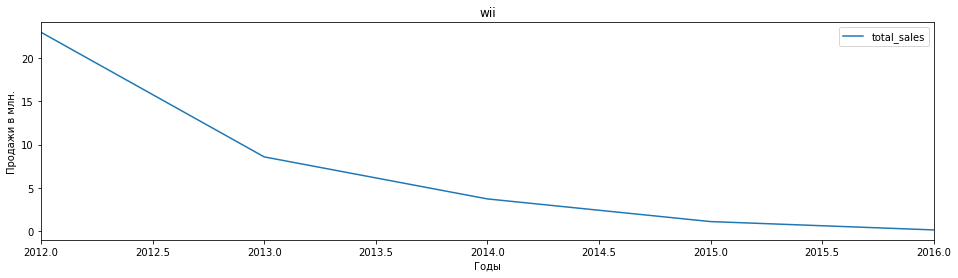

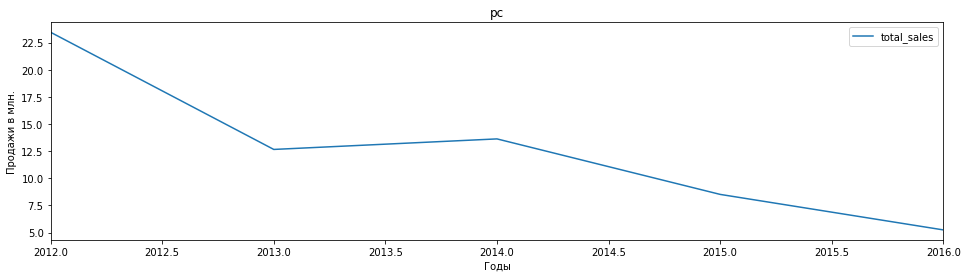

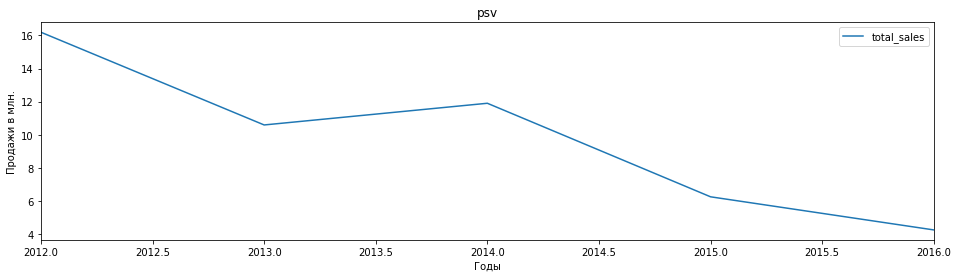

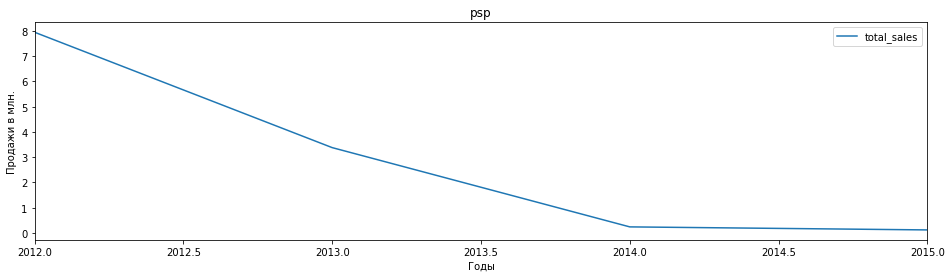

In [46]:
for platform in actual_data['platform'].unique():
    actual_platform_sales_years.loc[(platform,)].plot(figsize= (16,4))
    plt.title(platform)
    plt.xlabel('Годы')
    plt.ylabel('Продажи в млн.')
    plt.show()

Совместим всё.

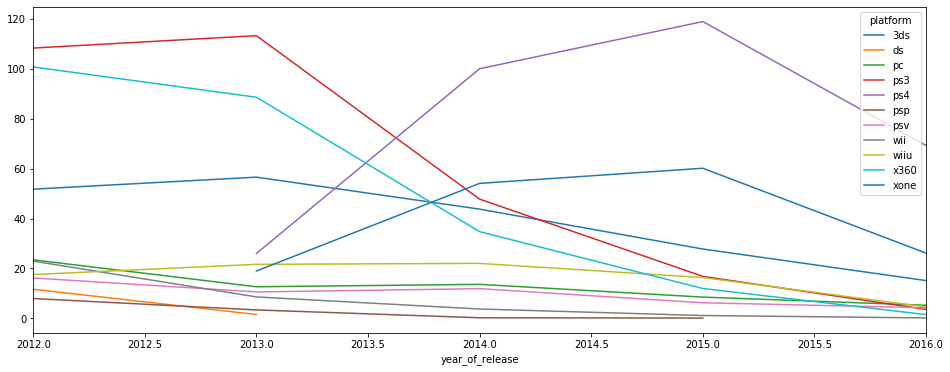

In [47]:
actual_data.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
).plot(figsize=(16,6))

Продажи в последнее время падают. Большие продажи на 2016 можно выделить у ps4 и xone. Именно они будут актуальны ближайшие годы. Судя по данным они обе появились в 2013. Остальные платформы старше и срок их жизни подходит к концу. Ну можно выделить еще x360. Её продажи падают не так сильно и она еще находится в топ-3 на 2016 год.

Дальше построим ящикис усами по глобальным продажам игр в разбивке по платформам.

In [48]:
def boxplots(row):
    actual_data.boxplot('total_sales', by = row, figsize=(16,5))
    plt.title(row)
    plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



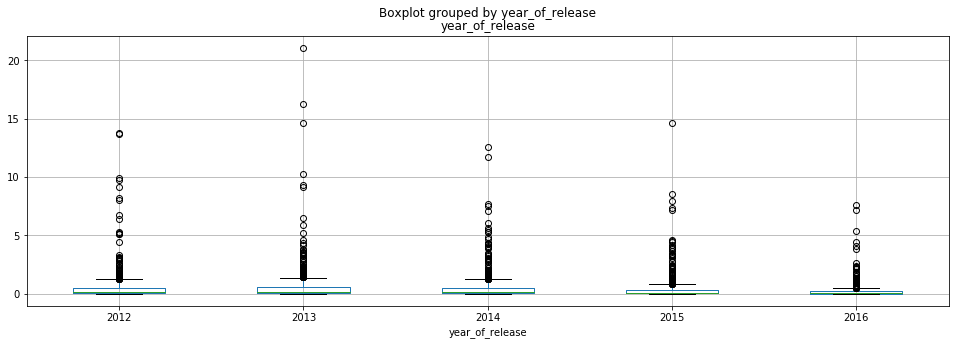

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



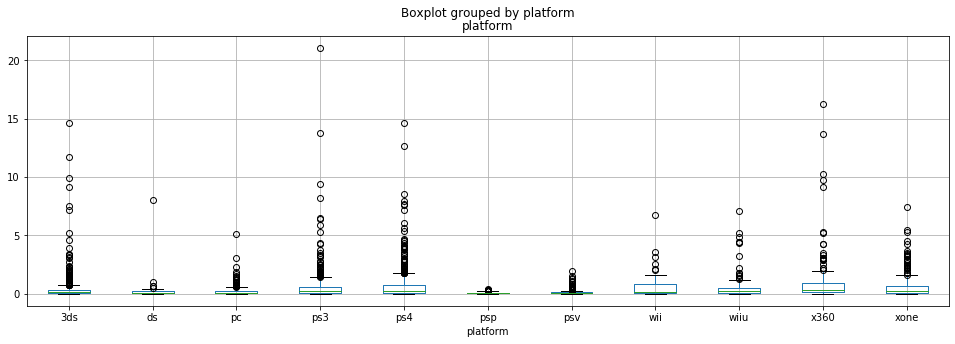

In [49]:
for column in ['year_of_release','platform']:
    boxplots(column)

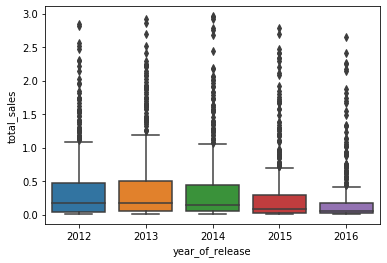

In [50]:
ax = sns.boxplot(x="year_of_release", y="total_sales", data=actual_data[actual_data['total_sales'] < 3])

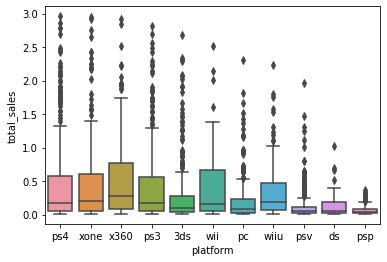

In [51]:
ax = sns.boxplot(x="platform", y="total_sales", data=actual_data[actual_data['total_sales'] < 3])

Выбросы в данном случае это игры-бестселлеры. У ps3 и x360 по одной игре продано свыше 20 миллионов копий. Много выбросов, говорят нам о том, что у платформы много игр с большими продажами. Соответственно, лучшие платформы имеют более растянутый ящик с усами.

Если говорить о периоде продаж, то тут тенденция к сокращению. С каждым город ящик становится все меньше, продажи даже у бестселлеров падают.

In [52]:
actual_data.sort_values(by=['total_sales'],ascending=False).head()

name platform  year_of_release         genre  \
0          grand theft auto v      ps3             2013        action   
1          grand theft auto v     x360             2013        action   
2   call of duty: black ops 3      ps4             2015       shooter   
3         pokemon x/pokemon y      3ds             2013  role-playing   
4  call of duty: black ops ii      ps3             2012       shooter   

   na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
0      7.02      9.09      0.98         3.96        21.05           9.7   
1      9.66      5.14      0.06         1.41        16.27           9.7   
2      6.03      5.86      0.36         2.38        14.63           0.0   
3      5.28      4.19      4.35         0.78        14.60           0.0   
4      4.99      5.73      0.65         2.42        13.79           8.3   

   user_score rating  
0         8.2      m  
1         8.1      m  
2         0.0      0  
3         0.0      0  
4         5.3      m

Kinect advencheres - лидер бестселлеров. Серия GTA актуальна всегда и везде.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. PlayStation4 - лидер по продажам в последнее время, возьмем данные по ней.

0.3877578521578009

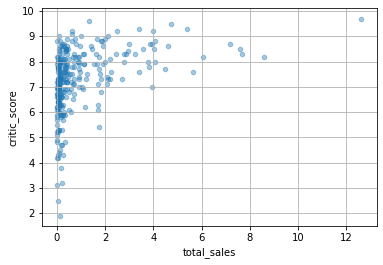

In [53]:
actual_data.query('platform == "ps4" and critic_score > 0').plot(
    x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.4)

actual_data.query('platform == "ps4" and critic_score > 0')['total_sales'].corr(
        actual_data.query('platform == "ps4" and critic_score > 0')['critic_score']) # корреляция

0.3422094757913528

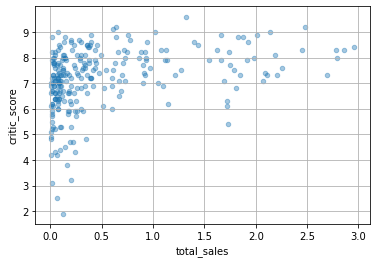

In [54]:
actual_data.query('platform == "ps4" and critic_score > 0 and total_sales < 3').plot(
    x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.4)

actual_data.query('platform == "ps4" and critic_score > 0 and total_sales < 5')['total_sales'].corr(
        actual_data.query('platform == "ps4" and critic_score > 0 and total_sales < 3')['critic_score']) # корреляция

Слабая корреляция есть, и даже видна на графике. Больше рейтинги - больше продаж. Но не всегда это работает, и не для каждой игры. Большая часть игр, например и миллион копий не продали, хотя если оценки и 7, и 8, и 9. Оценки мало влияют на продажи. Посмотрим оценки пользователей.

0.05368430508020425

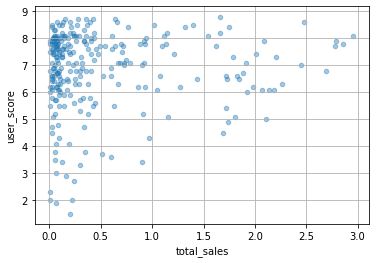

In [55]:
actual_data.query('platform == "ps4" and user_score > 0 and total_sales < 3').plot(
    x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.4)

actual_data.query('platform == "ps4" and user_score > 0 and total_sales < 3')['total_sales'].corr(
        actual_data.query('platform == "ps4" and user_score > 0 and total_sales < 3')['user_score']) # корреляция

Тут график аналогичен,но корреляция около нуля. Получается продажи от оценок пользователей вообще не зависят никак.

Теперь посмотрим и сравним данные по другим платформам.

Корреляция для ps3 = 0.42460695424797806
Корреляция для x360 = 0.4025351049718561
Корреляция для ps4 = 0.3422094757913528
Корреляция для 3ds = 0.3117036653069543
Корреляция для ds = 0.5582265139735486
Корреляция для xone = 0.3781068834655467
Корреляция для wiiu = 0.3250599477857086
Корреляция для wii = 0.3964007238050621
Корреляция для pc = 0.2976401668571376
Корреляция для psv = 0.1562624858614285
Корреляция для psp = 0.32613477588126355


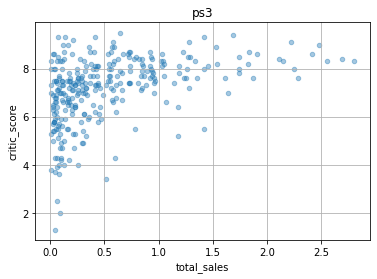

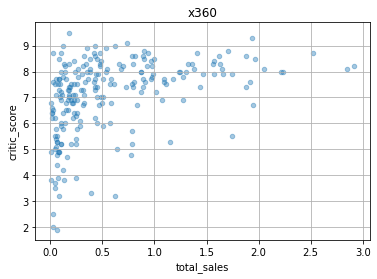

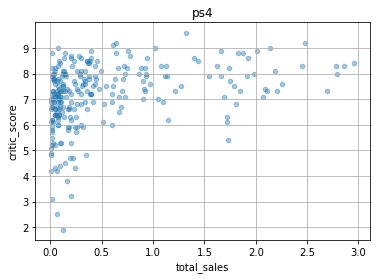

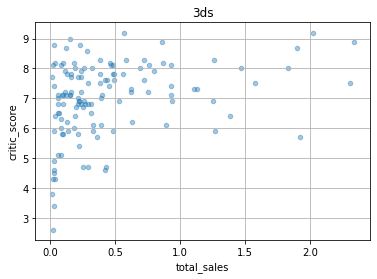

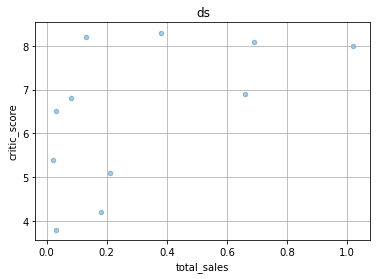

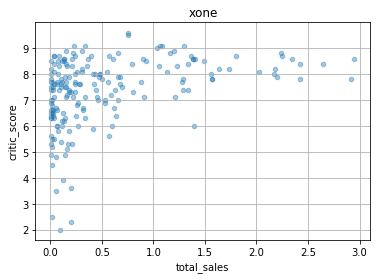

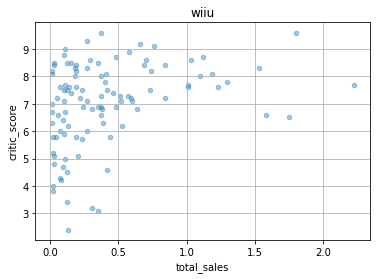

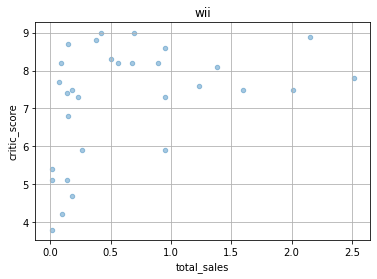

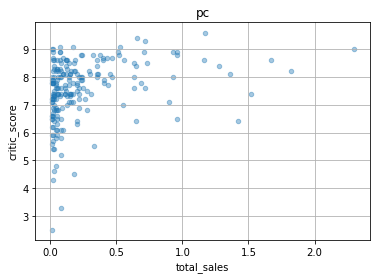

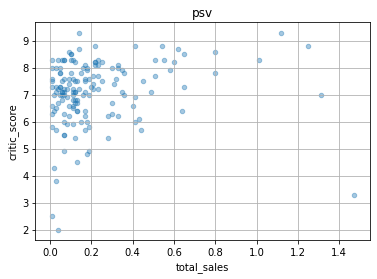

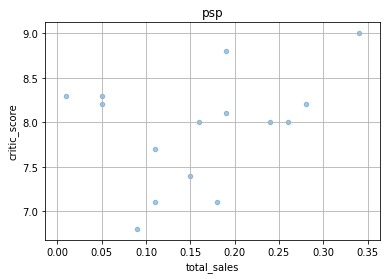

In [56]:
platform_names = actual_data['platform'].unique()
for platform in platform_names:
    actual_data.query('platform == @platform and critic_score > 0 and total_sales < 3').plot(
    x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.4, title=platform)
    x = actual_data.query('platform == @platform and critic_score > 0 and total_sales < 3')['total_sales'].corr(
        actual_data.query('platform == @platform and critic_score > 0 and total_sales < 3')['critic_score']
    )
    print('Корреляция для', platform, '=', x)

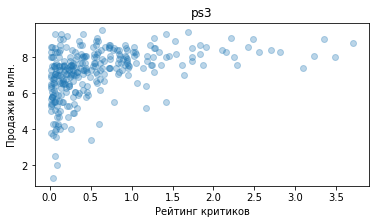

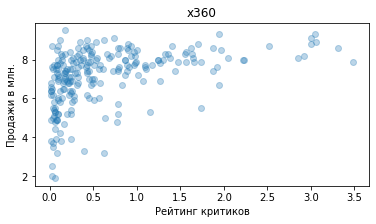

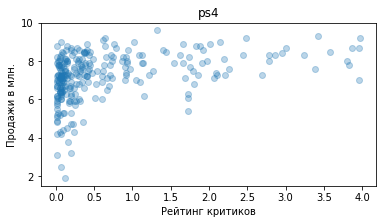

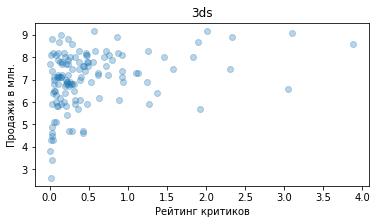

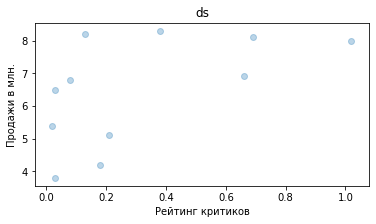

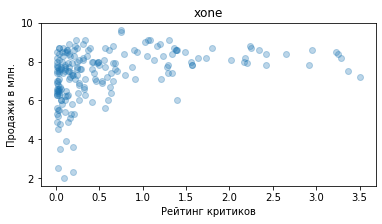

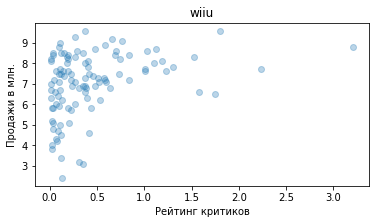

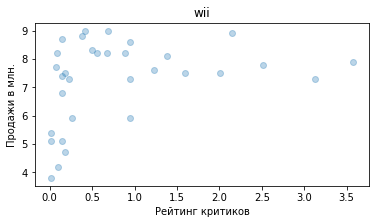

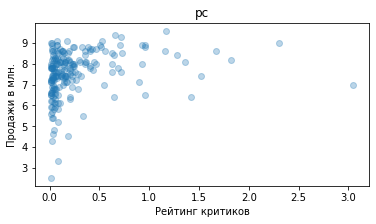

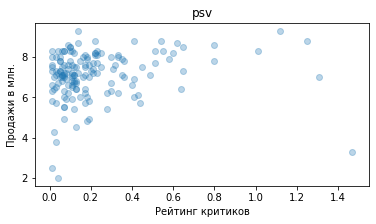

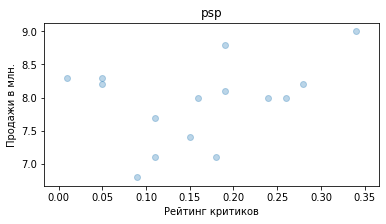

In [57]:
for platform in platform_names:
    data_temp = actual_data.query('platform == @platform and total_sales < 4 and critic_score > 0')
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.scatter(x = data_temp['total_sales'], y = data_temp['critic_score'],alpha=0.3)
    plt.xlabel("Рейтинг критиков")
    plt.ylabel("Продажи в млн.")
    plt.title(platform)
    plt.show()

<div class="alert alert-info">
<h2>Комментарий студента</h2>

Как сделать несколько в линию?
</div>

Для разных платформ ситуация примерно одинаковая. Слабая корреляция общих продаж с рейтингами критиков.

Корреляция для ps3 = 0.09281105937543438
Корреляция для x360 = 0.09295427537180737
Корреляция для ps4 = 0.05368430508020425
Корреляция для 3ds = 0.22852341442705568
Корреляция для ds = 0.5665697054916002
Корреляция для xone = -0.07403688647132603
Корреляция для wiiu = 0.3447363408435935
Корреляция для wii = 0.27005765513528496
Корреляция для pc = -0.03400316887451791
Корреляция для psv = 0.04156769224431711
Корреляция для psp = -0.40284833912045864


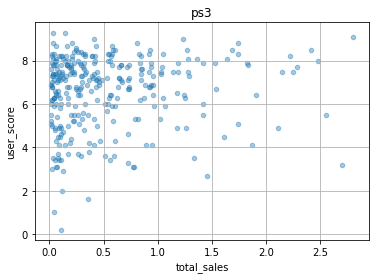

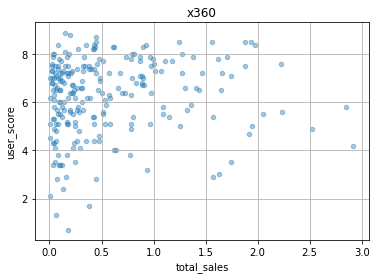

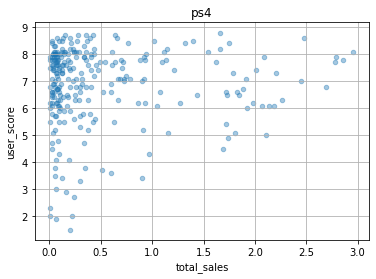

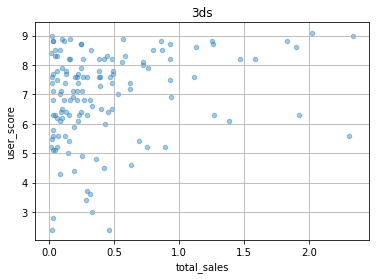

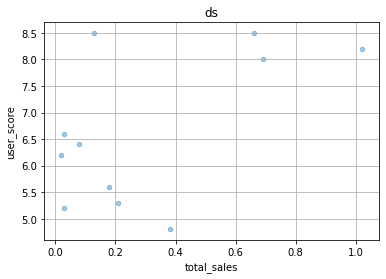

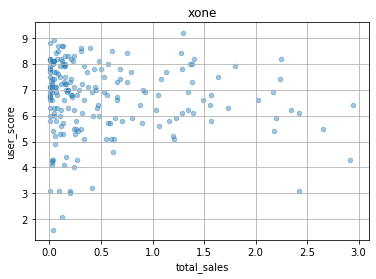

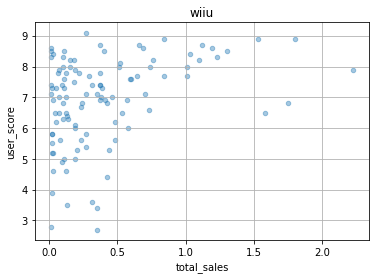

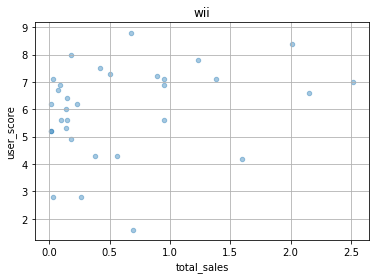

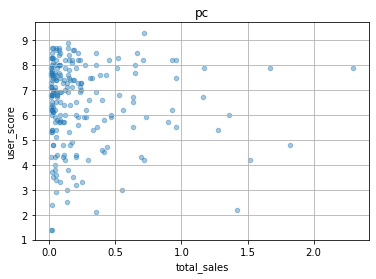

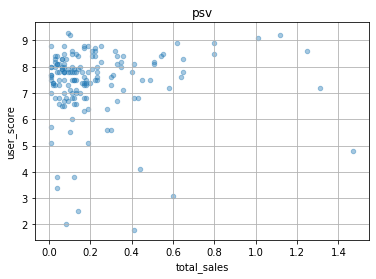

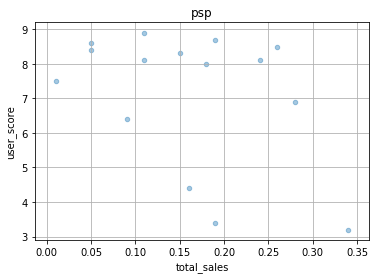

In [58]:
for platform in platform_names:
    actual_data.query('platform == @platform and user_score > 0 and total_sales < 3').plot(
    x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.4, title=platform)
    x= actual_data.query('platform == @platform and user_score > 0 and total_sales < 3')['total_sales'].corr(
        actual_data.query('platform == @platform and user_score > 0 and total_sales < 3')['user_score']
    )
    print('Корреляция для', platform, '=', x)

По оценкам пользователей. Для некоторых платформ остаётся слабая корреляция, для большинства же она близка к нулю.

**Получается, независимо от платформ и игр на них, оценки критиков и пользователей либо слабо влияют на продажи, либо не влияют практически никак.**

Посмотрим на общее распределение игр по жанрам.

In [59]:
genres_sales = actual_data.pivot_table(index='genre', values=['total_sales'], aggfunc=['sum','count'])
genres_sales.columns = ['total_sales','count']
genres_sales['sales/game'] = genres_sales['total_sales'] / genres_sales['count']
genres_sales.sort_values(by =['total_sales'],ascending=False)

total_sales  count  sales/game
genre                                       
action             446.41   1041    0.428828
shooter            304.75    237    1.285865
role-playing       192.80    370    0.521081
sports             181.07    268    0.675634
misc                85.28    193    0.441865
platform            61.00     85    0.717647
racing              53.50    115    0.465217
fighting            44.49    109    0.408165
simulation          35.12     80    0.439000
adventure           29.43    302    0.097450
strategy            13.34     71    0.187887
puzzle               4.89     28    0.174643

Данные по жанрам. Больше всего выпускается action-игр. Оттого и по продажам они в лидерах. Но по средней выручке на игру в лидерах с большим отрывом шутеры. Самый прибыльный жанр. В айтсайдерах по продажам и прибыльности adventure, strategy, puzzle.
Люди не любят сильно думать играя в игры.

## Портрет пользователя каждого региона

У нас есть 3 отдельных региона. Посмотрим какие платформы лидируют в каждом регионе и какова их доля.

In [60]:
na_sales = actual_data.pivot_table(
index=['platform'],values=['na_sales'],aggfunc='sum').sort_values(by=['na_sales'],ascending=False)
eu_sales = actual_data.pivot_table(
index=['platform'],values=['eu_sales'],aggfunc='sum').sort_values(by=['eu_sales'],ascending=False)
jp_sales = actual_data.pivot_table(
index=['platform'],values=['jp_sales'],aggfunc='sum').sort_values(by=['jp_sales'],ascending=False)

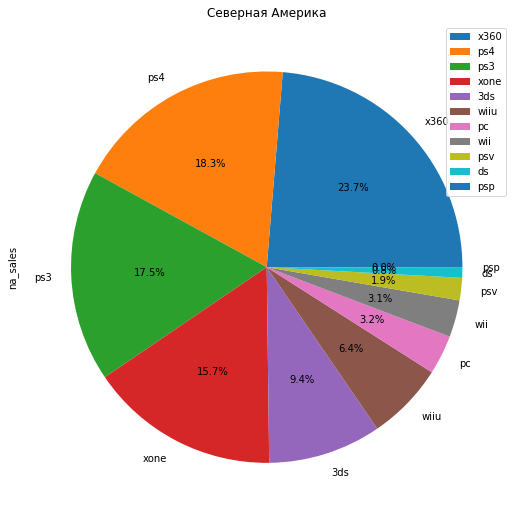

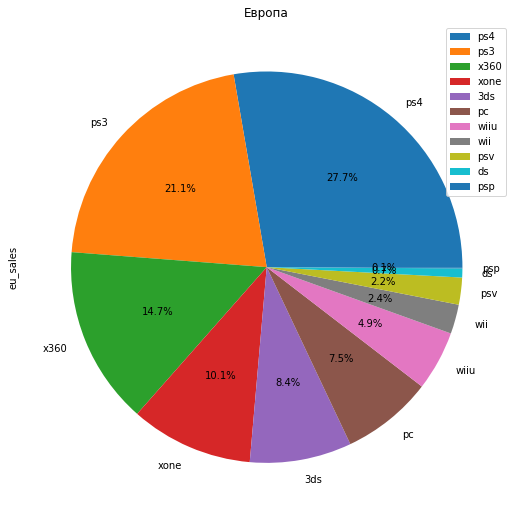

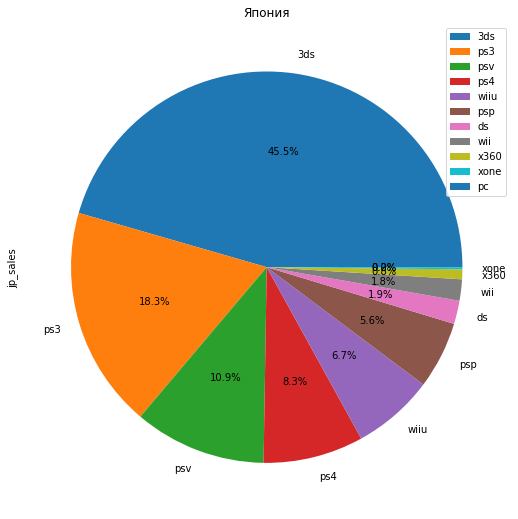

In [61]:
na_sales.plot(kind='pie', y ='na_sales', autopct='%1.1f%%',figsize=(9,9),title='Северная Америка') # построим графики
eu_sales.plot(kind='pie', y ='eu_sales', autopct='%1.1f%%',figsize=(9,9),title='Европа')
jp_sales.plot(kind='pie', y ='jp_sales', autopct='%1.1f%%',figsize=(9,9),title='Япония')

Как видно, в разных регионах разный лидер рынка среди платформ. В Америке x360 доминирует над ps3 и остальными. В Европе же наоборот, PlayStation'ы 3 и 4. А в Японии вообще 3ds занимает треть рынка. В каждом регионе топ-5 платформ разный, но везде они занимают примерно 75% рынка. Но всё это данные на основе продаж копий игр, по деньгам доли рынка могут быть совсем другими.

Теперь посмотрим какие где жанры популярны.

In [62]:
na_genres = actual_data.pivot_table(
index=['genre'],values=['na_sales'],aggfunc='sum').sort_values(by=['na_sales'],ascending=False)
eu_genres = actual_data.pivot_table(
index=['genre'],values=['eu_sales'],aggfunc='sum').sort_values(by=['eu_sales'],ascending=False)
jp_genres = actual_data.pivot_table(
index=['genre'],values=['jp_sales'],aggfunc='sum').sort_values(by=['jp_sales'],ascending=False)

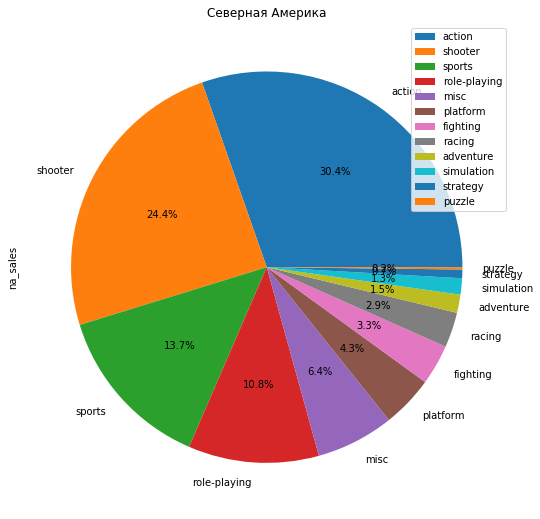

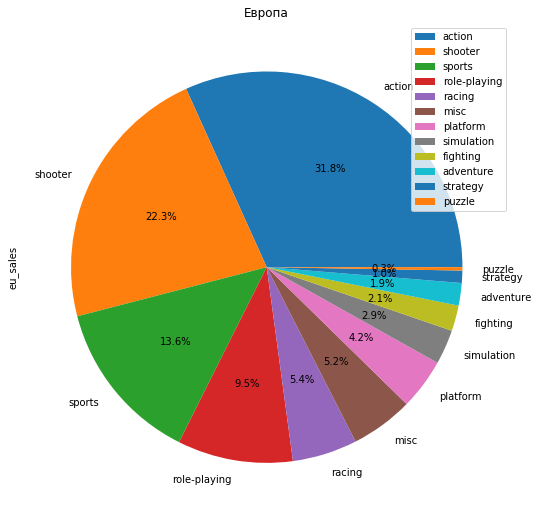

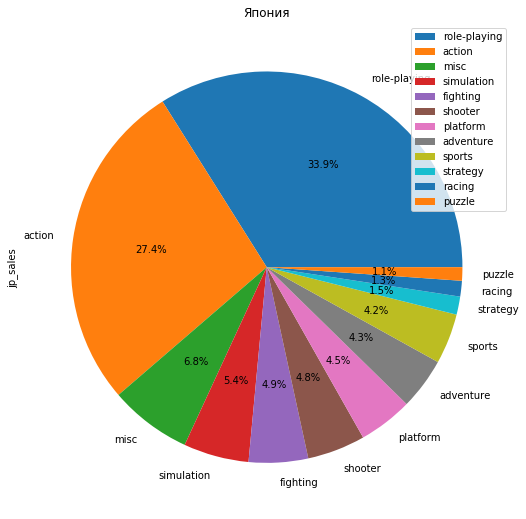

In [63]:
na_genres.plot(kind='pie', y ='na_sales', autopct='%1.1f%%',figsize=(9,9),title='Северная Америка') # построим графики
eu_genres.plot(kind='pie', y ='eu_sales', autopct='%1.1f%%',figsize=(9,9),title='Европа')
jp_genres.plot(kind='pie', y ='jp_sales', autopct='%1.1f%%',figsize=(9,9),title='Япония')

Предпочтения в жанрах у американцев и европейцев очень похожи(любят экшен,шутеры и спорт). А вот в Японии предпочтения другие, жанр role-playing тут неоспоримый лидер,экшен тоже любим,а вот в шутеры не особо любят играть.

Узнаем влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [64]:
esrb = actual_data.query('rating != "0"')[['na_sales','eu_sales','jp_sales','rating']].reset_index(drop=True)
#actual_data.query(rating != 0)['total_sales'].corr(
#        actual_data.query('platform == "ps4" and critic_score > 0')['critic_score']) # корреляция

In [65]:
esrb_with_zero = actual_data[['na_sales','eu_sales','jp_sales','rating']].reset_index(drop=True)

In [66]:
esrb_pivot = esrb.pivot_table(
index=['rating'], values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').sort_values(by =['na_sales'],ascending=False)
esrb_pivot

eu_sales  jp_sales  na_sales
rating                              
m         206.43     22.59    242.34
e         115.35     29.27    117.74
e10+       59.85      8.57     80.12
t          57.04     29.13     69.80

m(для взрослых) лидер по продажам в Европе и Америке, е(для всех) идет следом, 3 место делят категория для детей от 10лет и подростков. В Японии опять все совсем по-другому.

In [67]:
esrb_with_zero_pivot = esrb_with_zero.pivot_table(
index=['rating'], values=['na_sales','eu_sales','jp_sales'],aggfunc='sum').sort_values(by =['na_sales'],ascending=False)
esrb_with_zero_pivot

eu_sales  jp_sales  na_sales
rating                              
m         206.43     22.59    242.34
e         115.35     29.27    117.74
0          70.51    103.26     83.30
e10+       59.85      8.57     80.12
t          57.04     29.13     69.80

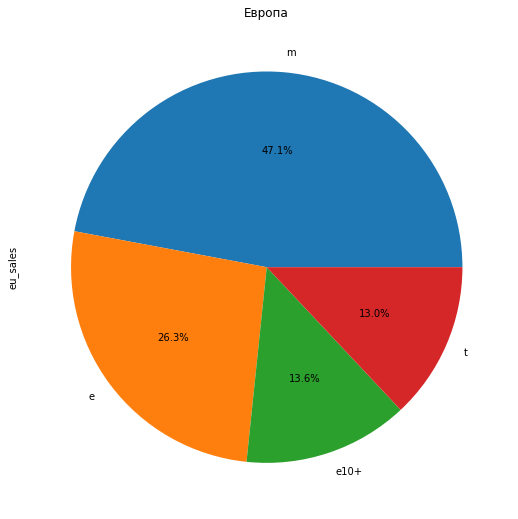

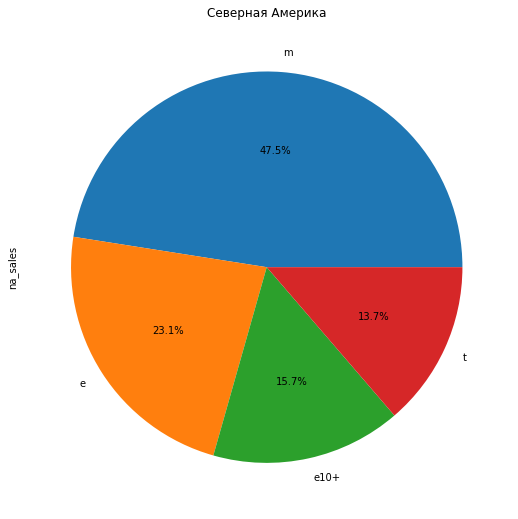

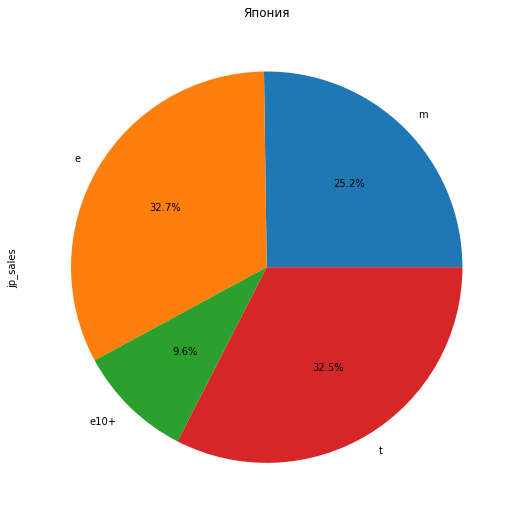

In [68]:
esrb_pivot['eu_sales'].plot(kind='pie', y ='eu_sales', autopct='%1.1f%%',figsize=(9,9),title='Европа')
plt.show()
esrb_pivot['na_sales'].plot(kind='pie', y ='na_sales', autopct='%1.1f%%',figsize=(9,9),title='Северная Америка')
plt.show()
esrb_pivot['jp_sales'].plot(kind='pie', y ='jp_sales', autopct='%1.1f%%',figsize=(9,9),title='Япония')
plt.show()

Геймеры из Америки и Европы очень похожы. В Японии геймеры должны быть моложе, игры со взрослым рейтингом составляют лишь пятую часть.

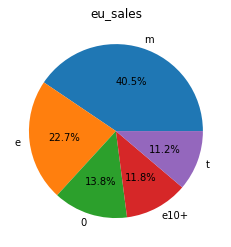

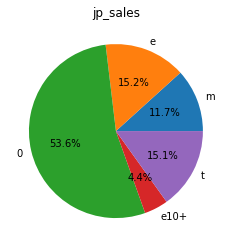

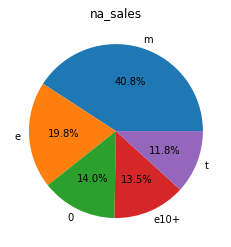

In [69]:
for column in esrb_with_zero_pivot:
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.pie(x = esrb_with_zero_pivot[column], labels=esrb_with_zero_pivot.index, autopct='%1.1f%%')
    ax.set_title(column)
    plt.show()

## Проверка гипотез

**Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

У нас 2 выборки пользовательских рейтингов. Вместо сравнения самих средних, используем датасеты для проведения статистического теста. Чтобы проверить гипотезу о равенстве средних двух выборочных совокупностей, применим метод scipy.stats.ttest_ind. Допустим, что нулевая гипотеза - равенство пользовательских рейтингов двух платформ. Соответственно альтернативная - их неравенсто.

In [70]:
xbox_rate = actual_data[actual_data['platform'] == "xone"].query('user_score > 0')['user_score']
pc_rate = actual_data[actual_data['platform'] == "pc"].query('user_score > 0')['user_score']

In [71]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(xbox_rate, pc_rate, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2398559557982108
Не получилось отвергнуть нулевую гипотезу


Похоже средние оценки находятся достаточно близко к друг другу. Вероятность далеко от уровня критической значимости и она достаточно высокая. Хоть они могут быть и не одинаковы,такое различие может быть случайно.

**Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные.**

В нулевой гипотезе мы всегда говорим о равенстве средних значений двух выборок, а в альтернативной - об их различии. Это связано с принципом работы т-теста. Поэтому нулевая - равенство, альтернативная - различие. Уровень

In [72]:
action_rate = actual_data[actual_data['genre'] == "action"].query('user_score > 0')['user_score']
sports_rate = actual_data[actual_data['genre'] == "sports"].query('user_score > 0')['user_score']

In [73]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(action_rate, sports_rate,equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8500478361661965e-24
Отвергаем нулевую гипотезу


А вот здесь совсем другая картина. Число очень маленькое. Таким образом тест показывает, что средние оценки действительно отличается. Уровень значимости попал в критический интервал. Средние по выборкам сильно отклоняются друг от друга, и вероятность этого весьма низка. Судя по популярности экшен-игр и непопулярности спортс, количестве продаж и тд. пользовательские рейтинги экшена намного выше спортс-жанра.

## Общий вывод.

Если давать прогнозы на ближайшие годы, то следует принять во внимание рынок, на котором будет магазин работать. Америка и Европа примерно похожи по предпочтениям пользователей,по продажам и по платформам. В Японии же надо делать ставку на совсем другие игры,другой жанр и платформы, да и рынок поменьше. На западе стоить продавать и рекламить экшен,шутеры,спорт на xbox360 и ps последних моделей. РПГ,игры для детей и тинейджеров прибыльней продвигать на востоке.